# Personal Project (Sharan Duggirala)

In [221]:
from __future__ import division
import pandas as pd

In [222]:
API_KEY = 'ac6a154f8cc2460e8044d7a9f85d348f'

## Acquiring Mined Palo Alto data

In [223]:
from opencage.geocoder import OpenCageGeocode

def get_lat_lon(query):
    
    geocoder = OpenCageGeocode(API_KEY)
    results = geocoder.geocode(query)
    return [results[0]['geometry']['lng'], results[0]['geometry']['lat']]

In [224]:
df = pd.read_csv('ZillowProjData-palo-alto.csv')
df

,price,address,city,state,zipcode,beds,baths,floor_size,year_built,Property_Type,HOA,Lot,PricePerSqFt,Description,remodel_year,Schools
0,53888000,"610 Los Trancos Rd,",Portola Valley,CA,94028,5,11,"12,657",2008,Single Family,None,13.4 acres,"$4,258",Silicon Valley Hilltop Estate. A Tech Titans F...,None,"['Lucille M. Nixon Elementary School', 'Terman..."
1,39988000,"369 Churchill Ave,",Palo Alto,CA,94301,5,10,"10,877",1917,Single Family,None,1.12 acres,"$3,676",None,1990,"['Walter Hays Elementary School', 'David Starr..."
2,1300000,"109 Webster St,",Palo Alto,CA,94301,1,1,692,1934,Single Family,$375/month,"2,178 sqft","$1,879",None,1934,"['Addison Elementary School', 'David Starr Jor..."
3,2895000,"325 Melville Ave,",Palo Alto,CA,94301,4,3,"1,805",1961,Single Family,None,"5,998 sqft","$1,604",Enjoy the Palo Alto community lifestyle only o...,1961,"['Walter Hays Elementary School', 'David Starr..."
4,24995000,"1500 Cowper St,",Palo Alto,CA,94301,5,8,"7,476",No Data,Single Family,None,0.34 acres,"$3,343",1500 Cowper provides a rare opportunity in Pal...,None,"['Walter Hays Elementary School', 'David Starr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2275000,"2581 Alma St,",Palo Alto,CA,94301,--,--,--,1955,Multi Family,None,None,No Data,None,None,"['El Carmelo Elementary School', 'Jane Lathrop..."
64,7250000,"1628 Bryant St,",Palo Alto,CA,94301,0.26,None,None,None,None,None,None,None,"This 11,375 SqFt lot in Old Palo Alto represen...",None,"['Walter Hays Elementary School', 'David Starr..."
65,2750000,"2750 Byron St,",Palo Alto,CA,94306,--,--,"1,454",1950,Multi Family,None,None,"$1,891",None,None,"['El Carmelo Elementary School', 'Jane Lathrop..."
66,2150000,"555 Byron St APT 309,",Palo Alto,CA,94301,2,3,"2,067",1997,Condo,$429/month,None,"$1,040",None,1997,"['Addison Elementary School', 'David Starr Jor..."


In [225]:
import numpy as np

# TESTING FUNCTION
def create_random_point(x0,y0,distance):

    r = distance/ 111300
    u = np.random.uniform(0,1)
    v = np.random.uniform(0,1)
    w = r * np.sqrt(u)
    t = 2 * np.pi * v
    x = w * np.cos(t)
    x1 = x / np.cos(y0)
    y = w * np.sin(t)
    return (x0+x1, y0 +y)

In [226]:
create_random_point(37.4498289, -122.1564923, 10)

(37.44982885270397, -122.15643408590078)

In [227]:
# Get Lat Lons of all the properties

lat_lon = []

for i, row in df.iterrows():
    query = row['address'] + row['city']
    result = get_lat_lon(query)
    lat_lon.append(result)

In [228]:
df['coordinates'] = lat_lon
df

,price,address,city,state,zipcode,beds,baths,floor_size,year_built,Property_Type,HOA,Lot,PricePerSqFt,Description,remodel_year,Schools,coordinates
0,53888000,"610 Los Trancos Rd,",Portola Valley,CA,94028,5,11,"12,657",2008,Single Family,None,13.4 acres,"$4,258",Silicon Valley Hilltop Estate. A Tech Titans F...,None,"['Lucille M. Nixon Elementary School', 'Terman...","[-122.2022742, 37.3629046]"
1,39988000,"369 Churchill Ave,",Palo Alto,CA,94301,5,10,"10,877",1917,Single Family,None,1.12 acres,"$3,676",None,1990,"['Walter Hays Elementary School', 'David Starr...","[-122.1485716, 37.4392388]"
2,1300000,"109 Webster St,",Palo Alto,CA,94301,1,1,692,1934,Single Family,$375/month,"2,178 sqft","$1,879",None,1934,"['Addison Elementary School', 'David Starr Jor...","[-122.1627023, 37.4527164]"
3,2895000,"325 Melville Ave,",Palo Alto,CA,94301,4,3,"1,805",1961,Single Family,None,"5,998 sqft","$1,604",Enjoy the Palo Alto community lifestyle only o...,1961,"['Walter Hays Elementary School', 'David Starr...","[-122.1515962, 37.4401364]"
4,24995000,"1500 Cowper St,",Palo Alto,CA,94301,5,8,"7,476",No Data,Single Family,None,0.34 acres,"$3,343",1500 Cowper provides a rare opportunity in Pal...,None,"['Walter Hays Elementary School', 'David Starr...","[-122.146693, 37.440319]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2275000,"2581 Alma St,",Palo Alto,CA,94301,--,--,--,1955,Multi Family,None,None,No Data,None,None,"['El Carmelo Elementary School', 'Jane Lathrop...","[-122.1374715, 37.4274141]"
64,7250000,"1628 Bryant St,",Palo Alto,CA,94301,0.26,None,None,None,None,None,None,None,"This 11,375 SqFt lot in Old Palo Alto represen...",None,"['Walter Hays Elementary School', 'David Starr...","[-122.1475441, 37.4369387]"
65,2750000,"2750 Byron St,",Palo Alto,CA,94306,--,--,"1,454",1950,Multi Family,None,None,"$1,891",None,None,"['El Carmelo Elementary School', 'Jane Lathrop...","[-122.1290005, 37.4318787]"
66,2150000,"555 Byron St APT 309,",Palo Alto,CA,94301,2,3,"2,067",1997,Condo,$429/month,None,"$1,040",None,1997,"['Addison Elementary School', 'David Starr Jor...","[-122.1564923, 37.4498289]"


In [229]:
# check if the lat lons are still in the Palo Alto area

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

PALO_ALTO_CENTER = [-122.143936, 37.468319]

drop = []

for index, row in df.iterrows():
    distance = haversine(row['coordinates'][0], row['coordinates'][1], 
                         PALO_ALTO_CENTER[0], PALO_ALTO_CENTER[1])
    if distance > 10:
        drop.append(index)
        
        
df = df.drop(drop)   
df

,price,address,city,state,zipcode,beds,baths,floor_size,year_built,Property_Type,HOA,Lot,PricePerSqFt,Description,remodel_year,Schools,coordinates
1,39988000,"369 Churchill Ave,",Palo Alto,CA,94301,5,10,"10,877",1917,Single Family,None,1.12 acres,"$3,676",None,1990,"['Walter Hays Elementary School', 'David Starr...","[-122.1485716, 37.4392388]"
2,1300000,"109 Webster St,",Palo Alto,CA,94301,1,1,692,1934,Single Family,$375/month,"2,178 sqft","$1,879",None,1934,"['Addison Elementary School', 'David Starr Jor...","[-122.1627023, 37.4527164]"
3,2895000,"325 Melville Ave,",Palo Alto,CA,94301,4,3,"1,805",1961,Single Family,None,"5,998 sqft","$1,604",Enjoy the Palo Alto community lifestyle only o...,1961,"['Walter Hays Elementary School', 'David Starr...","[-122.1515962, 37.4401364]"
4,24995000,"1500 Cowper St,",Palo Alto,CA,94301,5,8,"7,476",No Data,Single Family,None,0.34 acres,"$3,343",1500 Cowper provides a rare opportunity in Pal...,None,"['Walter Hays Elementary School', 'David Starr...","[-122.146693, 37.440319]"
5,2450000,"3991 Bibbits Dr,",Palo Alto,CA,94303,3,2,"1,156",1957,Single Family,None,"7,731 sqft","$2,119","Open Sat/Sun Mar 7/8 1:30-4:30 Bright, cherry ...",1957,"['Fairmeadow Elementary School', 'Jane Lathrop...","[-122.1072422, 37.4217316]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2275000,"2581 Alma St,",Palo Alto,CA,94301,--,--,--,1955,Multi Family,None,None,No Data,None,None,"['El Carmelo Elementary School', 'Jane Lathrop...","[-122.1374715, 37.4274141]"
64,7250000,"1628 Bryant St,",Palo Alto,CA,94301,0.26,None,None,None,None,None,None,None,"This 11,375 SqFt lot in Old Palo Alto represen...",None,"['Walter Hays Elementary School', 'David Starr...","[-122.1475441, 37.4369387]"
65,2750000,"2750 Byron St,",Palo Alto,CA,94306,--,--,"1,454",1950,Multi Family,None,None,"$1,891",None,None,"['El Carmelo Elementary School', 'Jane Lathrop...","[-122.1290005, 37.4318787]"
66,2150000,"555 Byron St APT 309,",Palo Alto,CA,94301,2,3,"2,067",1997,Condo,$429/month,None,"$1,040",None,1997,"['Addison Elementary School', 'David Starr Jor...","[-122.1564923, 37.4498289]"


## Acquiring Housing Development Project Data

In [230]:
df_housing = pd.read_csv('Subsidized_Rental.csv')
df_housing = df_housing.drop([32, 33, 34]) 
df_housing

,Sl #,Project Name & Location,Construction Completion Date,Units,Type of Households Served / Notes
0,1,"Stevenson House, 455 East Charleston",1968,120.00,Seniors
1,2,"Colorado Park, 1141 Colorado Ave",1972,60.00,Families / Seniors (17 units Section 8)
2,3*,"Palo Alto Gardens, 648 San Antonio",1999/1973**,156.00,1999 Preservation; Families / Seniors
3,4,"Arastradero Park, 574 Arastradero",1995 / 1974**,66.00,1995 Preservation (47 units Section 8) Familie...
4,5,"Lytton Gardens I, 656 Lytton Ave",1975,218.00,Seniors
5,6,"Webster Wood Apts, 941 Webster St",2001 / 1978**,68.00,2001 Preservation Families / Handicapped (4 un...
6,7,"Lytton Gardens II, 656 Lytton Ave",1979,100.00,Seniors (50 Independent Living; 50 Residential...
7,8*,"Sheridan Apartments, 360 Sheridan",1998 / 1979 **,57.00,1998 Preservation (56 units Section 8) Seniors...
8,9,"Elm Apartments, 129 Emerson St",1980,11.00,Families (8 units Sec. 8 Mod. Rehab)
9,10,Pine Street House 1259 Pine St,1981,1.00,Families


In [231]:
housing_lat_lon = []

for index, row in df_housing.iterrows():
    query = row['Project Name & Location'] + ', Palo Alto' + ', California'
    result = get_lat_lon(query)
    housing_lat_lon.append(result)
    
df_housing['coordinates'] = housing_lat_lon
df_housing

,Sl #,Project Name & Location,Construction Completion Date,Units,Type of Households Served / Notes,coordinates
0,1,"Stevenson House, 455 East Charleston",1968,120.00,Seniors,"[-122.11301, 37.418389]"
1,2,"Colorado Park, 1141 Colorado Ave",1972,60.00,Families / Seniors (17 units Section 8),"[-122.117348, 37.439422]"
2,3*,"Palo Alto Gardens, 648 San Antonio",1999/1973**,156.00,1999 Preservation; Families / Seniors,"[-122.103338, 37.414223]"
3,4,"Arastradero Park, 574 Arastradero",1995 / 1974**,66.00,1995 Preservation (47 units Section 8) Familie...,"[-122.124632, 37.408573]"
4,5,"Lytton Gardens I, 656 Lytton Ave",1975,218.00,Seniors,"[-122.158552, 37.450952]"
5,6,"Webster Wood Apts, 941 Webster St",2001 / 1978**,68.00,2001 Preservation Families / Handicapped (4 un...,"[-122.152495, 37.446088]"
6,7,"Lytton Gardens II, 656 Lytton Ave",1979,100.00,Seniors (50 Independent Living; 50 Residential...,"[-122.158552, 37.450952]"
7,8*,"Sheridan Apartments, 360 Sheridan",1998 / 1979 **,57.00,1998 Preservation (56 units Section 8) Seniors...,"[-122.141419, 37.425368]"
8,9,"Elm Apartments, 129 Emerson St",1980,11.00,Families (8 units Sec. 8 Mod. Rehab),"[-122.167497, 37.447744]"
9,10,Pine Street House 1259 Pine St,1981,1.00,Families,"[-122.140865, 37.44508]"


In [232]:
# Filter the Housing Development Projects

drop = []

for index, row in df_housing.iterrows():
    distance = haversine(row['coordinates'][0], row['coordinates'][1], 
                         PALO_ALTO_CENTER[0], PALO_ALTO_CENTER[1])
    if distance > 10:
        drop.append(index)
        
        
df_housing = df_housing.drop(drop)   
df_housing

,Sl #,Project Name & Location,Construction Completion Date,Units,Type of Households Served / Notes,coordinates
0,1,"Stevenson House, 455 East Charleston",1968,120.00,Seniors,"[-122.11301, 37.418389]"
1,2,"Colorado Park, 1141 Colorado Ave",1972,60.00,Families / Seniors (17 units Section 8),"[-122.117348, 37.439422]"
2,3*,"Palo Alto Gardens, 648 San Antonio",1999/1973**,156.00,1999 Preservation; Families / Seniors,"[-122.103338, 37.414223]"
3,4,"Arastradero Park, 574 Arastradero",1995 / 1974**,66.00,1995 Preservation (47 units Section 8) Familie...,"[-122.124632, 37.408573]"
4,5,"Lytton Gardens I, 656 Lytton Ave",1975,218.00,Seniors,"[-122.158552, 37.450952]"
5,6,"Webster Wood Apts, 941 Webster St",2001 / 1978**,68.00,2001 Preservation Families / Handicapped (4 un...,"[-122.152495, 37.446088]"
6,7,"Lytton Gardens II, 656 Lytton Ave",1979,100.00,Seniors (50 Independent Living; 50 Residential...,"[-122.158552, 37.450952]"
7,8*,"Sheridan Apartments, 360 Sheridan",1998 / 1979 **,57.00,1998 Preservation (56 units Section 8) Seniors...,"[-122.141419, 37.425368]"
8,9,"Elm Apartments, 129 Emerson St",1980,11.00,Families (8 units Sec. 8 Mod. Rehab),"[-122.167497, 37.447744]"
9,10,Pine Street House 1259 Pine St,1981,1.00,Families,"[-122.140865, 37.44508]"


## Difference between Houses near and not near Housing Projects

In [233]:
housing_project_nearby = []
nearest_housing_project = []

CLUSTERING_DISTANCE = 1 # In Miles

for index0, df_row in df.iterrows():
    nearest_project = [-0.118092, 51.509865] # Location of London
    closest_distance = float('inf')
    for index1, housing_row in df_housing.iterrows():
        distance = haversine(df_row['coordinates'][0], df_row['coordinates'][1], 
                             housing_row['coordinates'][0], housing_row['coordinates'][1])
        if distance < closest_distance:
            nearest_project = housing_row['coordinates']
            closest_distance = distance
    if closest_distance < CLUSTERING_DISTANCE:
        housing_project_nearby.append(True)
        nearest_housing_project.append(nearest_project)
    else:
        housing_project_nearby.append(False)
        nearest_housing_project.append(None)     

df['Housing Project Nearby'] = housing_project_nearby
df['Nearest Housing Project'] = nearest_housing_project

df

,price,address,city,state,zipcode,beds,baths,floor_size,year_built,Property_Type,HOA,Lot,PricePerSqFt,Description,remodel_year,Schools,coordinates,Housing Project Nearby,Nearest Housing Project
1,39988000,"369 Churchill Ave,",Palo Alto,CA,94301,5,10,"10,877",1917,Single Family,None,1.12 acres,"$3,676",None,1990,"['Walter Hays Elementary School', 'David Starr...","[-122.1485716, 37.4392388]",True,"[-122.152495, 37.446088]"
2,1300000,"109 Webster St,",Palo Alto,CA,94301,1,1,692,1934,Single Family,$375/month,"2,178 sqft","$1,879",None,1934,"['Addison Elementary School', 'David Starr Jor...","[-122.1627023, 37.4527164]",True,"[-122.158552, 37.450952]"
3,2895000,"325 Melville Ave,",Palo Alto,CA,94301,4,3,"1,805",1961,Single Family,None,"5,998 sqft","$1,604",Enjoy the Palo Alto community lifestyle only o...,1961,"['Walter Hays Elementary School', 'David Starr...","[-122.1515962, 37.4401364]",True,"[-122.1573547, 37.442712]"
4,24995000,"1500 Cowper St,",Palo Alto,CA,94301,5,8,"7,476",No Data,Single Family,None,0.34 acres,"$3,343",1500 Cowper provides a rare opportunity in Pal...,None,"['Walter Hays Elementary School', 'David Starr...","[-122.146693, 37.440319]",True,"[-122.140865, 37.44508]"
5,2450000,"3991 Bibbits Dr,",Palo Alto,CA,94303,3,2,"1,156",1957,Single Family,None,"7,731 sqft","$2,119","Open Sat/Sun Mar 7/8 1:30-4:30 Bright, cherry ...",1957,"['Fairmeadow Elementary School', 'Jane Lathrop...","[-122.1072422, 37.4217316]",True,"[-122.104134, 37.425986]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2275000,"2581 Alma St,",Palo Alto,CA,94301,--,--,--,1955,Multi Family,None,None,No Data,None,None,"['El Carmelo Elementary School', 'Jane Lathrop...","[-122.1374715, 37.4274141]",True,"[-122.138827, 37.427461]"
64,7250000,"1628 Bryant St,",Palo Alto,CA,94301,0.26,None,None,None,None,None,None,None,"This 11,375 SqFt lot in Old Palo Alto represen...",None,"['Walter Hays Elementary School', 'David Starr...","[-122.1475441, 37.4369387]",True,"[-122.14355, 37.429479]"
65,2750000,"2750 Byron St,",Palo Alto,CA,94306,--,--,"1,454",1950,Multi Family,None,None,"$1,891",None,None,"['El Carmelo Elementary School', 'Jane Lathrop...","[-122.1290005, 37.4318787]",True,"[-122.131764, 37.424347]"
66,2150000,"555 Byron St APT 309,",Palo Alto,CA,94301,2,3,"2,067",1997,Condo,$429/month,None,"$1,040",None,1997,"['Addison Elementary School', 'David Starr Jor...","[-122.1564923, 37.4498289]",True,"[-122.158552, 37.450952]"


In [234]:
df_housing_near = df.loc[df['Housing Project Nearby'] == True]
df_housing_far = df.loc[df['Housing Project Nearby'] == False]

df_housing_near

,price,address,city,state,zipcode,beds,baths,floor_size,year_built,Property_Type,HOA,Lot,PricePerSqFt,Description,remodel_year,Schools,coordinates,Housing Project Nearby,Nearest Housing Project
1,39988000,"369 Churchill Ave,",Palo Alto,CA,94301,5,10,"10,877",1917,Single Family,None,1.12 acres,"$3,676",None,1990,"['Walter Hays Elementary School', 'David Starr...","[-122.1485716, 37.4392388]",True,"[-122.152495, 37.446088]"
2,1300000,"109 Webster St,",Palo Alto,CA,94301,1,1,692,1934,Single Family,$375/month,"2,178 sqft","$1,879",None,1934,"['Addison Elementary School', 'David Starr Jor...","[-122.1627023, 37.4527164]",True,"[-122.158552, 37.450952]"
3,2895000,"325 Melville Ave,",Palo Alto,CA,94301,4,3,"1,805",1961,Single Family,None,"5,998 sqft","$1,604",Enjoy the Palo Alto community lifestyle only o...,1961,"['Walter Hays Elementary School', 'David Starr...","[-122.1515962, 37.4401364]",True,"[-122.1573547, 37.442712]"
4,24995000,"1500 Cowper St,",Palo Alto,CA,94301,5,8,"7,476",No Data,Single Family,None,0.34 acres,"$3,343",1500 Cowper provides a rare opportunity in Pal...,None,"['Walter Hays Elementary School', 'David Starr...","[-122.146693, 37.440319]",True,"[-122.140865, 37.44508]"
5,2450000,"3991 Bibbits Dr,",Palo Alto,CA,94303,3,2,"1,156",1957,Single Family,None,"7,731 sqft","$2,119","Open Sat/Sun Mar 7/8 1:30-4:30 Bright, cherry ...",1957,"['Fairmeadow Elementary School', 'Jane Lathrop...","[-122.1072422, 37.4217316]",True,"[-122.104134, 37.425986]"
6,3898000,"2493 Waverley St,",Palo Alto,CA,94301,3,2,"2,369",1948,Single Family,None,"5,998 sqft","$1,645",Enjoy this fabulous quiet North Midtown locati...,1975,"['El Carmelo Elementary School', 'Jane Lathrop...","[-122.1353063, 37.4315995]",True,"[-122.138827, 37.427461]"
7,2850000,"540 Irven Ct,",Palo Alto,CA,94306,3,2,"2,241",1935,Single Family,None,"5,780 sqft","$1,272",This updated Barron Park Home has kept the del...,1935,"['Juana Briones Elementary School', 'Terman Mi...","[-122.1252608, 37.4100591]",True,"[-122.124632, 37.408573]"
8,4488000,"142 Kellogg Ave,",Palo Alto,CA,94301,6,5,"3,250",2019,Single Family,None,"5,000 sqft","$1,381",None,None,"['Walter Hays Elementary School', 'David Starr...","[-122.1521854, 37.4368866]",True,"[-122.1573547, 37.442712]"
9,5750000,"4152 Baker Ave,",Palo Alto,CA,94306,5,7,"4,512",2020,Single Family,None,"7,749 sqft","$1,274","Open HouseSun, Mar 81:30 PM - 4:30 PM{""@type"":...",1949,"['Juana Briones Elementary School', 'Terman Mi...","[-122.1270008, 37.4096883]",True,"[-122.124632, 37.408573]"
10,5498000,"644 Georgia Ave,",Palo Alto,CA,94306,5,5,"3,092",2020,Single Family,None,"8,402 sqft","$1,778",What I love about this homeBarron Park is know...,2018,"['Juana Briones Elementary School', 'Terman Mi...","[-122.1321941, 37.405488]",True,"[-122.126909, 37.405071]"


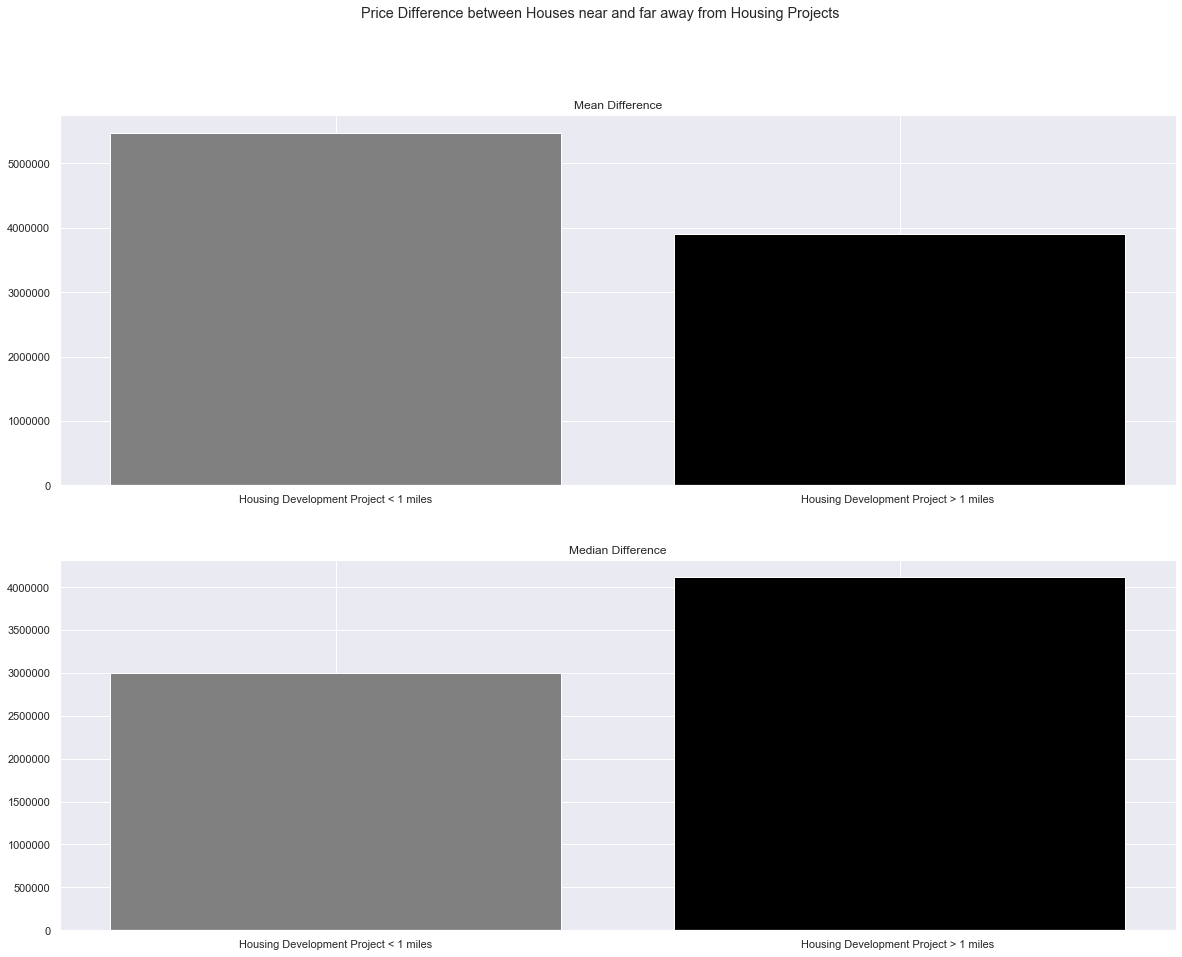

In [235]:
import matplotlib.pyplot as plt

houses = (f'Housing Development Project < {CLUSTERING_DISTANCE} miles', 
          f'Housing Development Project > {CLUSTERING_DISTANCE} miles ')
averages0 = (df_housing_near['price'].mean(), df_housing_far['price'].mean())
averages1 = (df_housing_near['price'].median(), df_housing_far['price'].median())

plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(2)
fig.suptitle('Price Difference between Houses near and far away from Housing Projects')
axs[0].set_title('Mean Difference')
axs[0].bar(houses, averages0, color=['gray', 'black'])
axs[1].set_title('Median Difference')
axs[1].bar(houses, averages1, color=['gray', 'black'])
plt.show()

## Finding Average Nearby Prices for Housing Projects

In [236]:
pd.options.display.float_format = '{:.2f}'.format

avg_prices = []

def cal_average(num):
    
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    
    return avg

for index1, housing_row in df_housing.iterrows():
    nearest_houses = []
    for index0, row in df_housing_near.iterrows():
        if row['Nearest Housing Project'] == housing_row['coordinates']:
            nearest_houses.append(row['price'])
                        
    if nearest_houses:
        avg_price = cal_average(nearest_houses)
    else:
        avg_price = None
        
    avg_prices.append(avg_price)
    
df_housing['Average Nearby Prices'] = avg_prices
df_housing

,Sl #,Project Name & Location,Construction Completion Date,Units,Type of Households Served / Notes,coordinates,Average Nearby Prices
0,1,"Stevenson House, 455 East Charleston",1968,120.00,Seniors,"[-122.11301, 37.418389]",2659999.00
1,2,"Colorado Park, 1141 Colorado Ave",1972,60.00,Families / Seniors (17 units Section 8),"[-122.117348, 37.439422]",nan
2,3*,"Palo Alto Gardens, 648 San Antonio",1999/1973**,156.00,1999 Preservation; Families / Seniors,"[-122.103338, 37.414223]",1225000.00
3,4,"Arastradero Park, 574 Arastradero",1995 / 1974**,66.00,1995 Preservation (47 units Section 8) Familie...,"[-122.124632, 37.408573]",2959972.00
4,5,"Lytton Gardens I, 656 Lytton Ave",1975,218.00,Seniors,"[-122.158552, 37.450952]",3650833.33
5,6,"Webster Wood Apts, 941 Webster St",2001 / 1978**,68.00,2001 Preservation Families / Handicapped (4 un...,"[-122.152495, 37.446088]",11371833.33
6,7,"Lytton Gardens II, 656 Lytton Ave",1979,100.00,Seniors (50 Independent Living; 50 Residential...,"[-122.158552, 37.450952]",3650833.33
7,8*,"Sheridan Apartments, 360 Sheridan",1998 / 1979 **,57.00,1998 Preservation (56 units Section 8) Seniors...,"[-122.141419, 37.425368]",nan
8,9,"Elm Apartments, 129 Emerson St",1980,11.00,Families (8 units Sec. 8 Mod. Rehab),"[-122.167497, 37.447744]",1750000.00
9,10,Pine Street House 1259 Pine St,1981,1.00,Families,"[-122.140865, 37.44508]",10838101.43


In [237]:
# Filter out the wrong format years

years = [] 

for index0, row in df_housing.iterrows():
    if len(row['Construction Completion Date']) > 4:
        years.append(int(row['Construction Completion Date'].split('/')[1].split('**')[0].strip()))
    else:
        years.append(int(row['Construction Completion Date']))
        
df_housing['Construction Completion Date'] = years
df_housing

,Sl #,Project Name & Location,Construction Completion Date,Units,Type of Households Served / Notes,coordinates,Average Nearby Prices
0,1,"Stevenson House, 455 East Charleston",1968,120.00,Seniors,"[-122.11301, 37.418389]",2659999.00
1,2,"Colorado Park, 1141 Colorado Ave",1972,60.00,Families / Seniors (17 units Section 8),"[-122.117348, 37.439422]",nan
2,3*,"Palo Alto Gardens, 648 San Antonio",1973,156.00,1999 Preservation; Families / Seniors,"[-122.103338, 37.414223]",1225000.00
3,4,"Arastradero Park, 574 Arastradero",1974,66.00,1995 Preservation (47 units Section 8) Familie...,"[-122.124632, 37.408573]",2959972.00
4,5,"Lytton Gardens I, 656 Lytton Ave",1975,218.00,Seniors,"[-122.158552, 37.450952]",3650833.33
5,6,"Webster Wood Apts, 941 Webster St",1978,68.00,2001 Preservation Families / Handicapped (4 un...,"[-122.152495, 37.446088]",11371833.33
6,7,"Lytton Gardens II, 656 Lytton Ave",1979,100.00,Seniors (50 Independent Living; 50 Residential...,"[-122.158552, 37.450952]",3650833.33
7,8*,"Sheridan Apartments, 360 Sheridan",1979,57.00,1998 Preservation (56 units Section 8) Seniors...,"[-122.141419, 37.425368]",nan
8,9,"Elm Apartments, 129 Emerson St",1980,11.00,Families (8 units Sec. 8 Mod. Rehab),"[-122.167497, 37.447744]",1750000.00
9,10,Pine Street House 1259 Pine St,1981,1.00,Families,"[-122.140865, 37.44508]",10838101.43


## Looking at the trend of nearby Housing compared to year of Housing Project Subsidization

In [238]:
## Clean the outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df_housing = remove_outlier(df_housing, 'Average Nearby Prices')

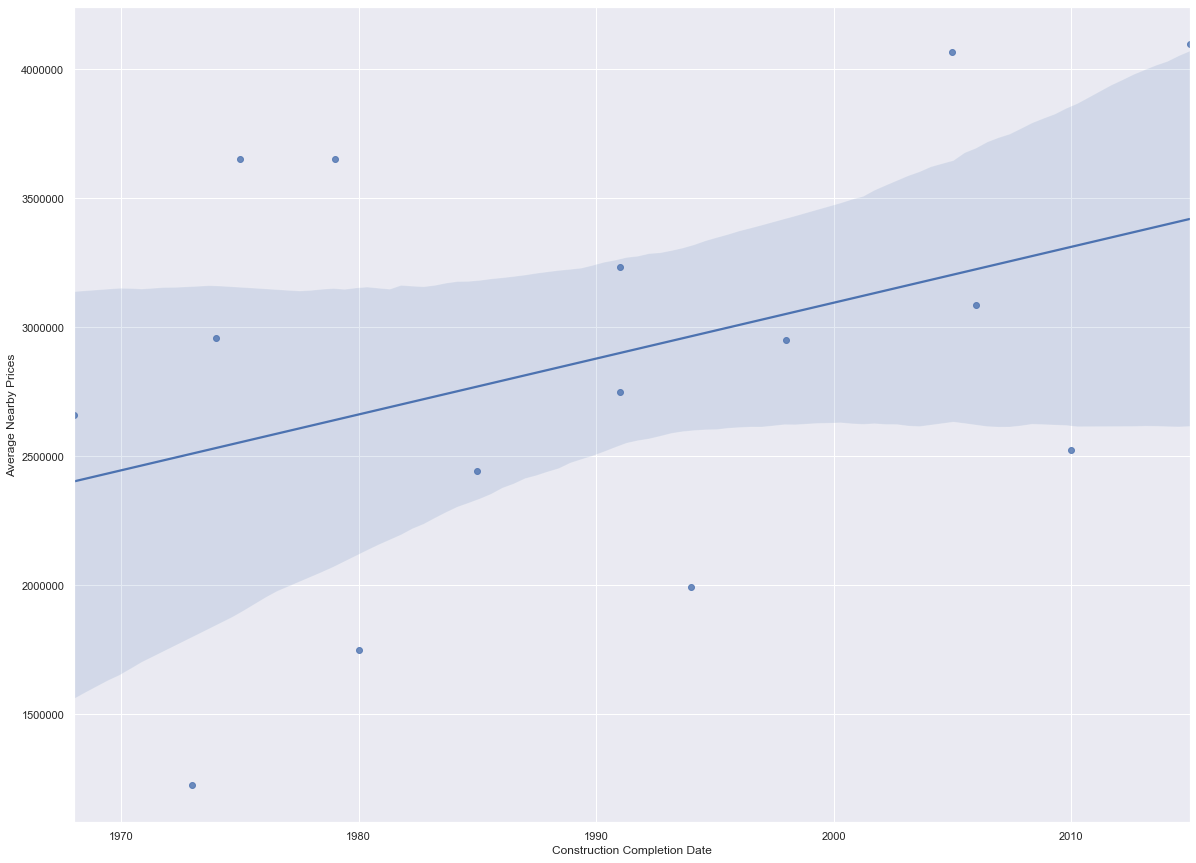

In [239]:
import seaborn as sns; sns.set(color_codes=True)

ax = sns.regplot(x = 'Construction Completion Date', y = 'Average Nearby Prices', data = df_housing)